# Project Luther MVP
### What does Facebook know about movies?

In [3]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split
from sklearn import metrics
%matplotlib inline
pd.options.display.max_rows = 10

# Data Description
The scraped data frame contains the following:

likes - number of facebook likes of the film

imdb - imdb rating of the film

metacritic -  metacritic score of the film

(director,writer,actor1,actor2,actor3) - number of facebook likes of the (director,writer,actor1,actor2,actor3)

 All of the data are transformed by standardizing against films released during the same time period.

# Model
Below, I will try to use the model to predict the critical reception of the film (metacritics aggregate score) using facebook popularities of the film and those involved in making the movie.

In [9]:
df = pd.DataFrame.from_csv('zscores.csv',header=0,index_col=None); df.head()

,director,imdb,likes,metacritic,writer,year,actor3,actor2,actor1
0,0.058511,1.036625,1.035670,1.637214,0.692924,2003,-3.173595,-3.972226,-3.136886
1,0.242825,0.358988,-3.163267,0.831485,0.695444,2005,-3.961961,-4.751953,-0.393670
2,0.055439,1.213035,1.024388,1.365871,-1.375858,2003,-3.173595,-3.363987,-4.088374
3,-2.484296,0.111921,-1.315556,-0.504497,-1.375858,2003,-3.173595,-3.588470,-4.227503
4,-1.703477,0.830522,-0.960428,0.945720,-1.205385,2006,-3.605762,-1.506756,-1.615972


In [14]:
totalscore = 0
for i in range(0,10):
    y = df.metacritic
    ones = (df.director*0+1)
    ones = ones.rename('bias')
    X = pd.concat([ones, df.likes, df.director, df.writer, df.actor1, df.actor2, df.actor3], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model = sm.OLS(y_train, X_train) 
    fit = model.fit()
    y_pred = fit.predict(X_test)
    score = metrics.r2_score(y_test, y_pred)
    print('Adj. r^2 score on iteration ' + str(i) + ': ' + str(score))
    totalscore += score
print('mean adj. r^2 score: '+ str(totalscore/10))

Adj. r^2 score on iteration 0: 0.161566228503
Adj. r^2 score on iteration 1: 0.149232820487
Adj. r^2 score on iteration 2: 0.142729236145
Adj. r^2 score on iteration 3: 0.175711889923
Adj. r^2 score on iteration 4: 0.164107305157
Adj. r^2 score on iteration 5: 0.172789882309
Adj. r^2 score on iteration 6: 0.148318513052
Adj. r^2 score on iteration 7: 0.154941185245
Adj. r^2 score on iteration 8: 0.165355633364
Adj. r^2 score on iteration 9: 0.165447139678
mean adj. r^2 score: 0.160019983386


In [11]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             metacritic   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     75.54
Date:                Tue, 04 Oct 2016   Prob (F-statistic):           2.33e-86
Time:                        13:22:49   Log-Likelihood:                -3135.5
No. Observations:                2324   AIC:                             6285.
Df Residuals:                    2317   BIC:                             6325.
Df Model:                           6                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
bias          -0.0096      0.019     -0.496      0.620        -0.048     0.028
likes          0.3123      0.023     13.852      0.000         0.268     0.357
director       0.1684      0.024      7.110      0.000         0.122     0.215
writer         0.0281      0.022      1.296      0.195        -0.014     0.071
actor1         0.0103      0.031      0.334      0.738        -0.050     0.071
actor2        -0.0266      0.038     -0.692      0.489        -0.102     0.049
actor3        -0.1381      0.031     -4.503      0.000        -0.198    -0.078
==============================================================================
Omnibus:                      691.147   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2678.426
Skew:                          -1.415   Prob(JB):                         0.00
Kurtosis:                       7.432   Cond. No.                         4.14
==============================================================================
"""

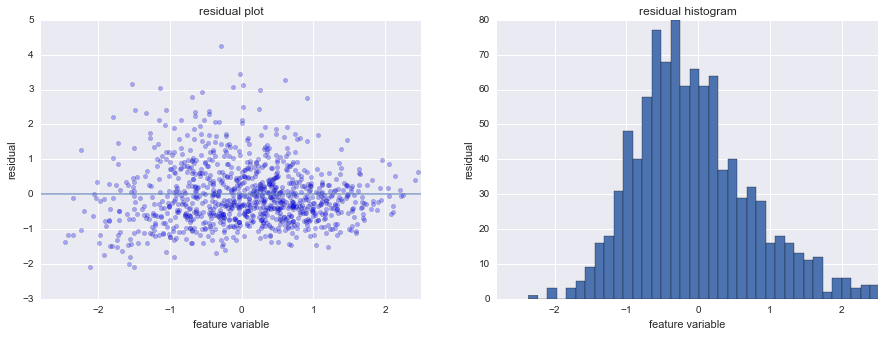

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(X_test.iloc[:,1], y_pred-y_test,alpha = .3)
plt.plot(X_test.iloc[:,1],X_test.iloc[:,1]*0,alpha = .5)
plt.xlabel('feature variable')
plt.ylabel('residual')
plt.xlim([-2.8,2.5])
plt.title('residual plot');

plt.subplot(1,2,2)
plt.hist(y_pred-y_test,bins = 50)
plt.xlabel('feature variable')
plt.ylabel('residual')
plt.xlim([-2.8,2.5])
plt.title('residual histogram');